<a href="https://colab.research.google.com/github/arefosco/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Milan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Milan, IT*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Milão(IT), e ver quais insights podem ser extraídos a partir de dados brutos.**

A fonte de dados utilizada foi a base de dados do Inside AIRBNB para a cidade de [Milão(IT)](http://insideairbnb.com/milan)

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lombardy/milan/2022-09-14/visualisations/listings.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,346020,Vittoria House,1754612,Franco,NaN,UMBRIA - MOLISE,45.45663,9.22249,Entire home/apt,40,3,0,NaN,NaN,1,198,0,NaN
1,6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44119,9.17813,Private room,100,4,12,2019-04-13,0.08,1,354,0,NaN
2,348448,"Centric studio (Brera). Piano, great view, par...",326090,Lelio,NaN,BRERA,45.47617,9.18873,Entire home/apt,99,1,82,2022-09-11,0.67,1,344,24,NaN
3,18208903,Casa Caterina Parco Nord Milano,125703074,Alessandro,NaN,PARCO NORD,45.52950,9.19361,Entire home/apt,72,3,286,2022-09-12,4.56,2,187,27,NaN
4,364897,Quiet apartment in the docks area,1842096,Claudia,NaN,TICINESE,45.45461,9.17554,Entire home/apt,93,2,43,2019-07-30,0.34,1,77,0,NaN


In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

###**Para este Projeto os dados utilizados para a ciadde de Milão são referentes ao mês de Novembro de 2022.**###

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de ID gerado pelo AIRBNB para identificar o imóvel
* `name` - Nome da propriedade atribuída pelo proprietário 
* `host_id` - Número do ID do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Coluna sem valores válidos
* `neighbourhood` - Bairro em que a habitação está localiazdo
* `Latitude` - Coordenada de Latitude da habitação
* `Longitude` - Coordenada de Longitude da habitação
* `room_type` - Tipo da habitação oferecida
* `price` - Preço de aluguel da habitação
* `minimum_nights` - Quantidade mínima de noites para reservar a habitação
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` -  Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `abailability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Quantidade de reviews no último mês
* `license` - Coluna sem valores válidos      

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,346020,Vittoria House,1754612,Franco,NaN,UMBRIA - MOLISE,45.45663,9.22249,Entire home/apt,40,3,0,NaN,NaN,1,198,0,NaN
1,6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44119,9.17813,Private room,100,4,12,2019-04-13,0.08,1,354,0,NaN
2,348448,"Centric studio (Brera). Piano, great view, par...",326090,Lelio,NaN,BRERA,45.47617,9.18873,Entire home/apt,99,1,82,2022-09-11,0.67,1,344,24,NaN
3,18208903,Casa Caterina Parco Nord Milano,125703074,Alessandro,NaN,PARCO NORD,45.52950,9.19361,Entire home/apt,72,3,286,2022-09-12,4.56,2,187,27,NaN
4,364897,Quiet apartment in the docks area,1842096,Claudia,NaN,TICINESE,45.45461,9.17554,Entire home/apt,93,2,43,2019-07-30,0.34,1,77,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificar o volume de dados do DataFrame
print("Este dataset possui:\t {} Entradas".format(df.shape[0]))
print("Este dataset possui:\t {} Variáveis".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Este dataset possui:	 19248 Entradas
Este dataset possui:	 18 Variáveis


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

###Conforme a análise do *dataset* foram obtidas:###
* 19.248 Entradas e 18 Variáveis

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.875623
reviews_per_month                 0.197527
last_review                       0.197527
name                              0.000468
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

###Conforme a análise do *dataset* foram obtidas variáveis com alta contagem de valores ausentes:###
* `neighbourhood_group`: Possivelmente 100% dos valores faltantes.
* `license`: Com possivelmenrte mais de 85% dos valores faltantes.
* `reviews_per_month` e `last_review`: com aproximadamente 20% dos valores faltantes

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, é necessária a análise do histograma:

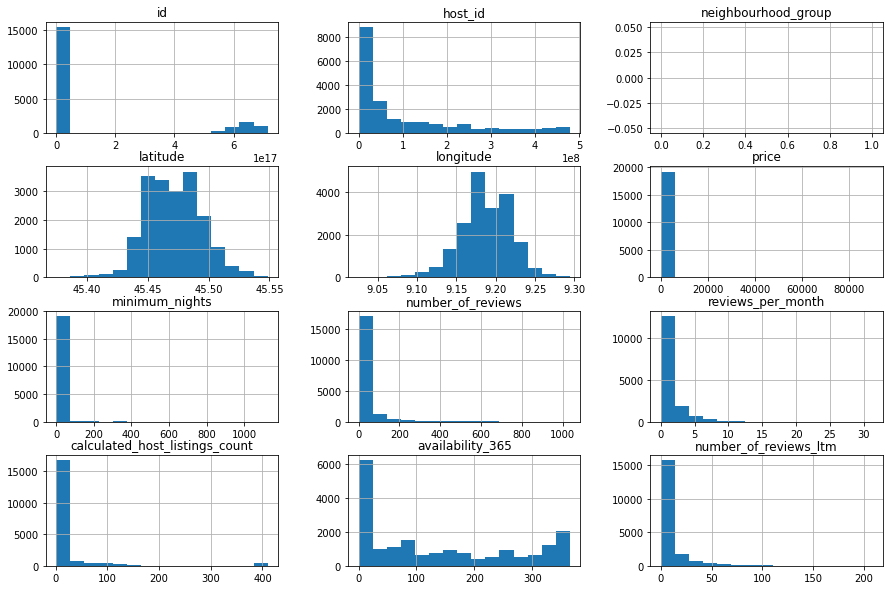

In [43]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize = (15,10));

###Conforme o Histograma nos mostra, devido a presença de Outliers, os histogramas ficam com um formato em que a visualização fica prejudicada.###

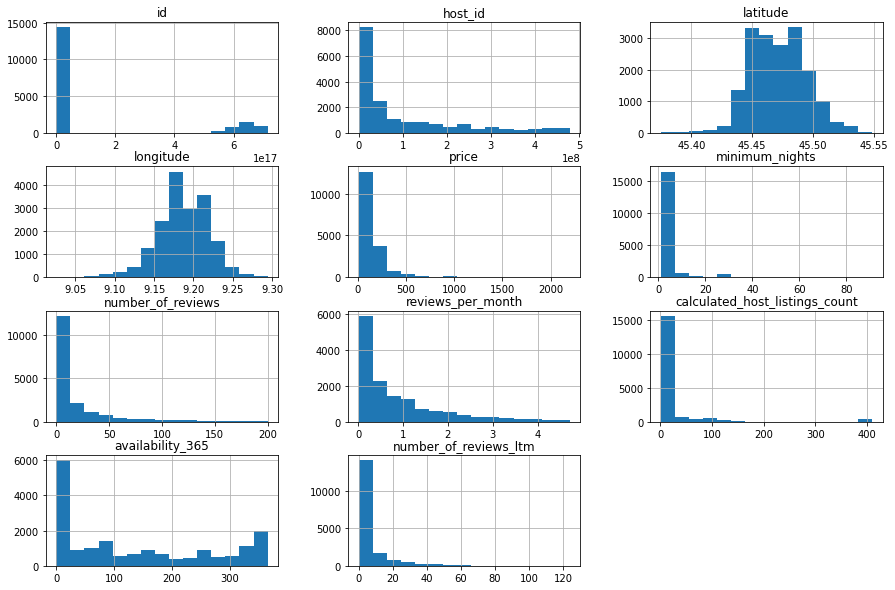

In [22]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3 * df_clean.price.std()].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 3 * df_clean.minimum_nights.std()].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 3 * df_clean.number_of_reviews.std()].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 3 * df_clean.reviews_per_month.std()].index, axis = 0, inplace = True)
# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)
# remover `license`, pois está vazio
df_clean.drop('license', axis = 1, inplace = True)
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [25]:
# ver a média da coluna `price``
print("A média dos valores das diárias para a cidade de Milão(IT) é de:\t ${}".format(df_clean.price.mean().round(2)))

A média dos valores das diárias para a cidade de Milão(IT) é de:	 $151.85


### **Q4. Qual a correlação existente entre as variáveis**

In [27]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'room_type', 'availability_365', 'neighbourhood']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,-0.078075,-0.106015,0.001445,0.097187
minimum_nights,-0.078075,1.000000,-0.062058,-0.115106,0.013926
number_of_reviews,-0.106015,-0.062058,1.000000,0.473549,-0.018447
reviews_per_month,0.001445,-0.115106,0.473549,1.000000,0.113516
availability_365,0.097187,0.013926,-0.018447,0.113516,1.000000


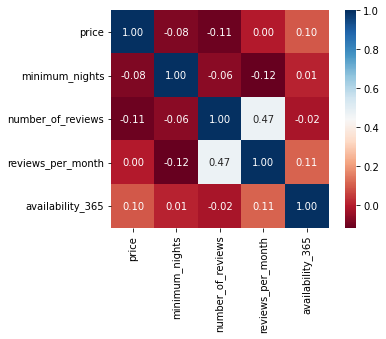

In [28]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square = True, linecolor='white', annot=True)

###Para verificar as correlações relevantes, foram geradas a matriz de correlação e o mapa de calor, que podem ser visualizados acima.###

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14055
Private room        3580
Shared room          253
Hotel room            50
Name: room_type, dtype: int64

In [34]:
# total de habitações disponíveis
df_clean.room_type.value_counts().sum()

17938

In [32]:
# mostrar a porcentagem de cada tipo de imóvel disponível
((df_clean.room_type.value_counts() / df_clean.shape[0]) * 100).round(2)

Entire home/apt    78.35
Private room       19.96
Shared room         1.41
Hotel room          0.28
Name: room_type, dtype: float64

###Conforme a análise do *dataset* foram obtidos os tipos de imóvel mais alugados em **Milão**, de um total de **17.938** disponíveis após a exclusão dos outliers:###
**Quantidade:**
* **Casas/Aptos inteiros: 14.055.**
* **Quartos privativos: 3.580.**
* **Quartos compartilhados: 253.**
* **Quartos de hotel: 50.**

**Porcentagem:**
* **Casas/Aptos inteiros: 78,35%.**
* **Quartos privativos: 19,96%.**
* **Quartos compartilhados: 1,41%.**
* **Quartos de hotel: 0,28%.**



### **Q6. Qual a localidade mais cara do dataset?**



In [36]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].round(2)

neighbourhood
RONCHETTO DELLE RANE    622.50
DUOMO                   304.21
BRERA                   239.68
TICINESE                227.74
GUASTALLA               215.04
VIGENTINA               213.54
PARCO SEMPIONE          210.06
GARIBALDI REPUBBLICA    206.00
MAGENTA - S. VITTORE    188.81
S. SIRO                 183.05
Name: price, dtype: float64

###Conforme a análise do *dataset* foram obtidos os bairros com os valores de alguel mais caros em **Milão**, de um total de **17.938** disponíveis após a exclusão dos outliers:###
**Bairros:**

* **RONCHETTO DELLE RANE: $622.50**

* **DUOMO: $304.21**

* **BRERA: $239.68**

* **TICINESE: $227.74**

* **GUASTALLA: $215.04**

* **VIGENTINA: $213.54**

* **PARCO SEMPIONE: $210.06**

* **GARIBALDI REPUBBLICA: $206.00**

* **MAGENTA - S. VITTORE: $188.81**

* **S. SIRO: $183.05**

**PREÇO MÉDIO - MILÃO(IT): $151.85**


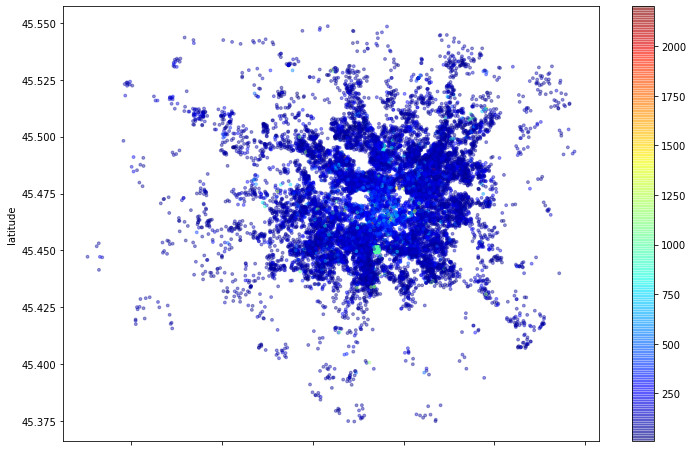

In [37]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [42]:
# ver a média da coluna `minimum_nights``
print("A média de quantidade mínima de noites para aluguel na cidade de Milão é de:\t {}".format(df_clean.minimum_nights.mean().round(2)))

A média de quantidade mínima de noites para aluguel na cidade de Milão é de:	 3.69


## Conclusões


Neste notebook foi feita uma análise superficial dos dados de habitações disponíveis para a Cidade de Milão, na Itália, tendo a base de dados sido obtida do Airbnb no mês de novembro de 2022.
Com o intuito de melhorar a análise foi feita a eliminação de alguns outliers identificados por meio da visualização de histogramas dos dados.
Por fim salienta-se que esta análise bem como o dataset utilizado é uma versão resumida, com número de atributos limitados. Para uma análise mais profunda e assertiva recomenda-se a análise do conjunto de dados completos do Airbnb, que possui 106 atributos.

Como resultados obtidos destacam-se:

* Análise inicial do *dataset*:
  * Entradas: 19.248
  * Variáveis: 18
* Variáveis excluídas após análise de *outliers*:
  * `neighbourhood_group`
  * `license`
* Média dos valores das diárias para a cidade de Milão(IT):	 $151.85
* Tipos de habitação mais alugados em Milão, de um total de 17.938 disponíveis, após a exclusão dos outliers:
  * Quantidade:
      * Casas/Aptos inteiros: 14.055.
      * Quartos privativos: 3.580.
      * Quartos compartilhados: 253.
      * Quartos de hotel: 50.

  * Porcentagem:
      * Casas/Aptos inteiros: 78,35%.
      * Quartos privativos: 19,96%.
      * Quartos compartilhados: 1,41%.
      * Quartos de hotel: 0,28%.
* Conforme a análise do dataset foram obtidos os bairros com os valores de alguel mais caros em Milão, de um total de 17.938 disponíveis após a exclusão dos outliers:
  * Bairros:

    * RONCHETTO DELLE RANE: $622.50

    * DUOMO: $304.21

    * BRERA: $239.68

    * TICINESE: $227.74

    * GUASTALLA: $215.04

    * VIGENTINA: $213.54

    * PARCO SEMPIONE: $210.06

    * GARIBALDI REPUBBLICA: $206.00

    * MAGENTA - S. VITTORE: $188.81

    * S. SIRO: $183.05
* Média de quantidade mínima de noites para aluguel na cidade de Milão é de:	 3.69